In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt


df = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [ ]:
X.shape

(1599, 11)

In [ ]:
Y.shape

(1599,)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=3) #A
regressor = LinearRegression()
regressor.fit(x_train, y_train)
coefcients=pd.DataFrame(regressor.coef_,df.iloc[:,:-1].columns)
coefcients.columns=['Coefcient']
#A usual splitting of data between train and test
#B Fitting to produce the coefcients

In [ ]:
print(coefcients.sort_values(by='Coefcient', ascending=False))

                      Coefcient
sulphates              0.823603
alcohol                0.294181
fixed acidity          0.023274
residual sugar         0.008119
free sulfur dioxide    0.005500
total sulfur dioxide  -0.003542
citric acid           -0.141268
pH                    -0.406325
volatile acidity      -0.991536
chlorides             -1.591924
density               -6.069166


In [ ]:
correlations = df.corr()['quality'].drop('quality')
correlations.iloc[ (-correlations.abs()).argsort()]

alcohol                 0.476166
volatile acidity       -0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
fixed acidity           0.124052
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
Name: quality, dtype: float64

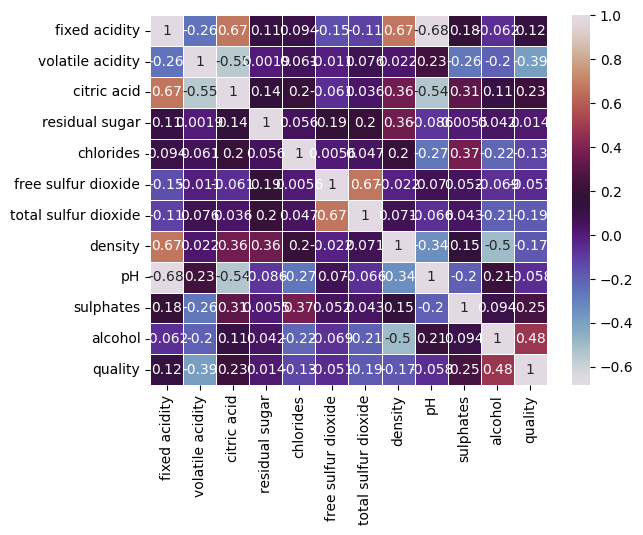

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, linewidths=.5,cmap="twilight")
plt.show()

In [ ]:
x_train_scaled = preprocessing.StandardScaler().fit_transform(x_train)

# scaling features
from sklearn import linear_model
regressor = linear_model.Lasso(alpha=0.045)

# selecting a Lasso regressor model
regressor.fit(x_train_scaled,y_train)

# training the Lasso regressor
coefcients=pd.DataFrame(regressor.coef_, df.iloc[:,:-1].columns)
coefcients.columns=['Coefcient']
print(coefcients.iloc[ (-coefcients.Coefcient.abs()).
argsort()])

                      Coefcient
alcohol                0.292478
volatile acidity      -0.170318
sulphates              0.079738
total sulfur dioxide  -0.036544
fixed acidity          0.020537
chlorides             -0.002670
citric acid            0.000000
residual sugar         0.000000
free sulfur dioxide    0.000000
density               -0.000000
pH                    -0.000000
